## Generating and Visualizing Alpha Shapes with Python Plotly ##

Starting with a finite set of 3D points, Plotly can generate a [`Mesh3d`](https://plot.ly/python/reference/#mesh3d)  object, that  depending on a key value can be the convex hull of that set, its Delaunay triangulation or an alpha set. 

This notebook is devoted to the presentation of the  alpha shape as a computational geometric object, its interpretation, and visualization with Plotly.

Alpha shape of a finite point set $S$ is a [polytope](https://en.wikipedia.org/wiki/Polytope) whose structure depends only on the set $S$ and a parameter $\alpha$.

Although it is less known in comparison to other computational geometric objects,  it has been used in many  practical applications in pattern recognition, surface reconstruction, molecurar structure modeling, porous media, astrophysics.

In order to understand how the algorithm underlying `Mesh3d` works,  we present shortly a few notions of Computational Geometry.

### Simplicial complexes and Delaunay triangulation ###

Let S be a finite set of 2D or 3D points. A point is called $0$-simplex or vertex. The [convex hull](https://en.wikipedia.org/wiki/Convex_hull) of:
 - two distinct points is  a 1-simplex or edge;
 - three non-colinear points is a 2-simplex or triangle;
 - four non-coplanar points in $\mathbb{R}^3$  is a 3-simplex or tetrahedron;

In [1]:
from IPython.display import HTML
HTML('<iframe src=https://plot.ly/~empet/13475/ width=850 height=350></iframe>')

If $T$ is the set of points defining a $k$-simplex, then any proper subset of $T$ defines an $\ell$-simplex, with $\ell<k$.
These $\ell$-simplexes (or $\ell$-simplices) are called faces. 

A 2-simplex has three $1$-simplexes, and three 0-simplexes as faces, whereas a tetrahedron has as faces three  2-simplexes, six 1-simplexes and four zero simplexes. 

k-simplexes are building blocks for different structures in Computational Geometry, mainly for creating meshes from point clouds.

Let $S$ be a finite set in $\mathbb{R}^d$, $d=2,3$ (i.e. a set of 2D or 3D points). A collection  $\mathcal{K}$ of k-simplexes, $0\leq k\leq d$,  having as vertices  the  points of $S$,
 is a *simplicial complex* if its simplexes have the following properties:
  1. If $\sigma$ is a simplex in $\mathcal{K}$, then all its faces are also simplexes in $\mathcal{K}$;
  2. If $\sigma, \tau$ are two simplexes in $\mathcal{K}$, then their intersection is either empty or a face in both simplexes.
                                      

The next figure illustrates a simplicial complex(left), and a collection of $k$-simplexes (right), $0\leq k\leq 2$
that do not form a simplicial complex because the condition 2 in the definition above is violated.

In [2]:
HTML('<iframe src=https://plot.ly/~empet/13503/ width=600 height=475></iframe>')

Triangular meshes used in computer graphics are examples of simplicial complexes.

The underlying space of a simplicial complex, $\mathcal{K}$, denoted $|\mathcal{K}|$,
is the union of its simplexes, i.e. it is a region in plane or in the 3D space, depending on whether d=2 or 3.


A *subcomplex* of the simplicial complex $\mathcal{K}$ is a collection, $\mathcal{L}$, of simplexes in $\mathcal{K}$ that also form a simplicial complex.

The points of a finite set $S$ in $\mathbb{R}^2$ (respectively $\mathbb{R}^3$) are in *general position* if no $3$ (resp 4)  points are collinear (coplanar), and no 4 (resp 5) points lie on the same circle (sphere).

A particular simplicial complex associated to a finite set of 2D or 3D points,  in general position, is the *Delaunay triangulation*.

A triangulation of a finite point set $S \subset \mathbb{R}^2$ (or $\mathbb{R}^3$)
is a collection $\mathcal{T}$ of triangles (tetrahedra),
such that:
  1. The union of all triangles (tetrahedra) in $\mathcal{T}$ is the convex hull of $S$.
  2. The union of all  vertices of triangles (tetrahedra) in  $\mathcal{T}$ is the set  $S$.
  3. For every distinct pair $\sigma, \tau \in \mathcal{T}$, the intersection $\sigma \cap \tau$ is either empty or  a common  face  of $\sigma$ and $\tau$.

A Delaunay triangulation of the set $S\subset\mathbb{R}^2$ ($\mathbb{R}^3$) is a triangulation with the property
that  the open balls bounded by the  circumcircles (circumspheres) of the triangulation
 triangles (tetrahedra) contain no point in $S$. One says that these balls are empty.

If the points of $S$ are in general position, then the Delaunay triangulation of $S$ is unique.

Here is an example of Delaunay triangulation of a set of ten 2D points. It illustrates the emptiness of two balls bounded by circumcircles.

In [3]:
HTML('<iframe src=https://plot.ly/~empet/13497/ width=550 height=550></iframe>')

### Alpha shape of a finite set of points ###

 The notion of Alpha Shape was introduced by [Edelsbrunner](https://users.cs.duke.edu/~edels/Papers/1983-J-06-ShapeSetPoints.pdf) with the aim to give  a mathematical description of the  shape of  a point set.

 In this notebook we give a constructive definition of this geometric structure. A more detailed approach of 3D alpha shapes can be found in the original [paper](https://users.cs.duke.edu/~edels/Papers/1994-J-04-3DAlphaShapes.pdf). 

An intuitive description of the alpha shape was given by Edelsbrunner and his coauthor 
in  a preprint of the last paper mentioned above:  
    
A huge mass of ice-cream fills a region in the 3D space,
and the point set $S$ consists in hard chocolate pieces spread in the ice-cream mass.
Using a sphere-formed ice-cream spoon we carve out the ice-cream such that to avoid  bumping into
chocolate pieces.  At the end of this operation the region  containing the ciocolate pieces
and the remaining ice cream is bounded by caps, arcs and points of chocolate. Straightening
all round faces to triangles and line segments we get the intuitive image of the
alpha shape of the point set $S$.

Now we give the steps of the computational alpha shape construction.

Let  $S$ be a finite set of points from $\mathbb{R}^d$, in general position,  $\mathcal{D}$ its Delaunay triangulation
and $\alpha$ a positive number.

Select the d-simplexes of $\mathcal{D}$ (i.e.  triangles in the case d=2, respectively  tetrahedra
for d=3) whose circumsphere has the radius less than $\alpha$. These simplexes and their faces form
a simplicial subcomplex of the Delaunay triangulation, $\mathcal{D}$.
It is denoted $\mathcal{C}_\alpha$, and called  $\alpha$-complex. 

The $\alpha$-shape of the set $S$ is defined by its authors, either as the underlying space of the $\alpha$-complex,
i.e. the union of all its simplexes or as the boundary of the $\alpha$-complex.

The boundary of the $\alpha$-complex is the subcomplex consisting in all k-simplexes,  $0\leq k<d$, that are faces of a single $d$-simplex (these are called external faces).



In the ice-cream example the alpha shape was defined as the boundary of the alpha-complex.

The underlying space of the $\alpha$-complex is the region where the ice-cream spoon has no access, because its  radius ($\alpha$) exceeds the radius of circumscribed spheres to tetrahedra formed by  pieces of chocolate.


To get insight into the process of construction of an alpha shape we illustrate it first  for a set of 2D points.

The following panel displays the  Delaunay triangulation of a set of 2D points, and a sequence of $\alpha$-complexes (and alpha shapes):

In [4]:
HTML('<iframe src=https://plot.ly/~empet/13479/ width=825 height=950></iframe>')

We notice that the Delaunay triangulation has as boundary a convex set (it is a triangulation of the convex hull
                                                                        of the given point set).

Each $\alpha$-complex is obtained from the Delaunay triangulation, removing  the triangles whose circumcircle has radius greater or equal to alpha. 

In the last subplot the triangles of the  $0.115$-complex are filled in with light blue. The filled in region  is the underlying space of the $0.115$-complex. 

The $0.115$-alpha shape of the given point set can be considered either the filled in region or its boundary.


This example illustrates that the underlying space of an  $\alpha$-complex in neither convex nor necessarily connected. It can consist in many connected components (in our illustration above, $|\mathcal{C}_{0.115}|$ has three components).

In a family of alpha shapes, the parameter $\alpha$ controls the level of detail of the associated alpha shape.  If $\alpha$ decreases to zero, the corresponding alpha shape degenerates to the point set, $S$, while  if it tends to infinity the alpha shape tends to the convex hull of the set $S$.

### Plotly `Mesh3d` ###

In order to generate the alpha shape of a given set of 3D points corresponding to a parameter $\alpha$,
the Delaunay triagulation or the convex hull we define a `Mesh3d` object or a dict. The real value
of the key `alphahull` points out the mesh type to be generated:
    
`alphahull`=$1/\alpha$    generates the $\alpha$-shape, -1 corresponds to the Delaunay
triangulation and 0, to the convex hull of the point set.

The other keys in the definition of a `Mesh3d` are given [here](https://plot.ly/python/reference/#mesh3d).

`Mesh3d` generates and displays an $\alpha$-shape as the boundary of the $\alpha$-complex.

An intuitive idea on the topological structure modification, as $\alpha=1/$`alphahull` varies can be gained from the following three different alpha shapes of the same point set:

In [5]:
HTML('<iframe src=https://plot.ly/~empet/13481/ width=900 height=950></iframe>')

We notice in the subplots above that as `alphahull` increases, i.e. $\alpha$ decreases, some parts of the alpha shape shrink and
develop enclosed void regions. The last plotted alpha shape points out a polytope that contains faces of tetrahedra,
and patches of triangles.

In some cases as $\alpha$ varies it is also possible to develop  components that are strings of edges and even isolated points. 

Such experimental results suggested the use of alpha shapes in modeling molecular structure.
A search on WEB gives many results related to applications of alpha shapes in structural molecular biology.

[Here](https://plot.ly/~empet/13485/molecular-like-structure-defined-as-an-alpha-shape-alphahull1730/)
is an alpha shape illustrating a molecular-like structure associated to a point set of 5000 points.

### Generating an alpha shape with `Mesh3d` ###

In [1]:
import numpy as np

Load data:

In [2]:
pts=np.loadtxt('./dataset/data-file.txt')
x,y,z=zip(*pts)

In [3]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly import tools as tls

Define two traces: one for plotting the point set and another for the alpha shape:

In [5]:
points=Scatter3d(mode = 'markers',
                 name = '',
                 x =x,
                 y= y, 
                 z= z,
                 marker = Marker( size=2, color='#458B00' )
)

In [6]:
simplexes = Mesh3d(alphahull =10.0,    
                   name = '',
                   x =x,
                   y= y, 
                   z= z,
                   color='90EE90', #set the color of simplexes in alpha shape
                   opacity=0.15   
)

In [7]:
x_style = dict( zeroline=False, range=[-2.85, 4.25], tickvals=np.linspace(-2.85, 4.25, 5)[1:].round(1))
y_style = dict( zeroline=False, range=[-2.65, 1.32], tickvals=np.linspace(-2.65, 1.32, 4)[1:].round(1))
z_style = dict( zeroline=False, range=[-3.67,1.4], tickvals=np.linspace(-3.67, 1.4, 5).round(1))


In [8]:
layout=Layout(title='Alpha shape of a set of 3D points. Alpha=0.1',
              width=500,
              height=500,
              scene = Scene(
              xaxis = x_style, 
              yaxis = y_style, 
              zaxis = z_style
             )
             )

In [43]:
fig=Figure(data=Data([points, simplexes]), layout=layout)
py.sign_in('whisponchan', '0QuAfcV72aBLgYS6ZLAQ')
py.iplot(fig, filename='3D-AlphaS-ex')

PlotlyRequestError: No message

###  Generating alpha shape of a set  of 2D points ###

We construct the alpha shape of a set of 2D points from the Delaunay triangulation, 
defined as a `scipy.spatial.Delaunay object`.

In [18]:
from scipy.spatial import Delaunay

In [19]:
def sq_norm(v): #squared norm 
    return np.linalg.norm(v)**2

Compute the circumcenter and circumradius of a triangle (see their definitions [here](https://en.wikipedia.org/wiki/Circumscribed_circle#Circumcircle_equations)):

In [20]:
def circumcircle(points,simplex):
    A=[points[simplex[k]] for k in range(3)]
    M=[[1.0]*4]
    M+=[[sq_norm(A[k]), A[k][0], A[k][1], 1.0 ] for k in range(3)] 
    M=np.asarray(M, dtype=np.float32) 
    S=np.array([0.5*np.linalg.det(M[1:,[0,2,3]]), -0.5*np.linalg.det(M[1:,[0,1,3]])]) 
    a=np.linalg.det(M[1:, 1:]) 
    b=np.linalg.det(M[1:, [0,1,2]]) 
    return S/a,  np.sqrt(b/a+sq_norm(S)/a**2) #center=S/a, radius=np.sqrt(b/a+sq_norm(S)/a**2)

Filter the Delaunay triangulation to get the $\alpha$-complex:

In [21]:
def get_alpha_complex(alpha, points, simplexes):
    #alpha is the parameter for the alpha shape
    #points are given data points 
    #simplexes is the  list of indices in the array of points 
    #that define 2-simplexes in the Delaunay triangulation
    
    return filter(lambda simplex: circumcircle(points,simplex)[1]<alpha, simplexes)

In [107]:
#pts=np.loadtxt('./dataset/data-ex-2d.txt')
#pts_food_tsne=np.loadtxt('./dataset/food_tsne.txt')
pts = np.loadtxt('./dataset/meal_tsne.txt')
tri = Delaunay(pts)

In [108]:
pts

array([[ -57.763954 ,   79.53495  ],
       [ -32.954346 ,  -10.065233 ],
       [ -28.353235 , -170.9819   ],
       [  53.27919  ,  -11.285285 ],
       [  39.194878 ,   82.1528   ],
       [ 127.35514  ,  -69.94204  ],
       [-125.87404  ,   -2.7089655],
       [ 132.6405   ,   34.723953 ],
       [  76.865685 , -152.75853  ],
       [ -90.05059  ,  -94.34025  ],
       [  11.4454975,  -86.6981   ]])

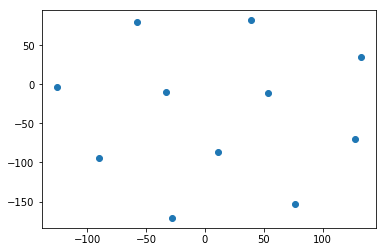

In [109]:
plt.scatter(pts[:,0],pts[:,1])

In [64]:
colors=['#C0223B', '#404ca0', 'rgba(173,216,230, 0.5)']# colors for vertices, edges and 2-simplexes

Get data for Plotly plot of a subcomplex of the Delaunay triangulation:

In [65]:
def Plotly_data(points, complex_s):
    #points are the given data points, 
    #complex_s is the list of indices in the array of points defining 2-simplexes(triangles) 
    #in the simplicial complex to be plotted
    X=[]
    Y=[]
    for s in complex_s:
        X+=[points[s[k]][0] for k in [0,1,2,0]]+[None]
        Y+=[points[s[k]][1] for k in [0,1,2,0]]+[None]
    return X,Y    

In [66]:
def make_trace(x, y,  point_color=colors[0], line_color=colors[1]):# define the trace
                                                                   #for an alpha complex
    return Scatter(mode='markers+lines', #set vertices and 
                                         #edges of the alpha-complex
                   name='',
                   x=x,
                   y=y,
                   marker=Marker(size=6.5, color=point_color),
                   line=Line(width=1.25, color=line_color),
                   
                  )

In [67]:
def make_XAxis(axis_style):
    return XAxis(axis_style)
    
def make_YAxis(axis_style):
    return YAxis(axis_style)  

In [112]:
figure = tls.make_subplots(rows=1, cols=2,
                           subplot_titles=('Delaunay triangulation',  'Alpha shape, alpha=0.15'),
                           horizontal_spacing=0.1, 
                          )

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [113]:
pl_width=800
pl_height=460
title = 'Delaunay triangulation and Alpha Complex/Shape for a Set of 2D Points'

figure['layout'].update(title=title,                                 
                        font= Font(family="Open Sans, sans-serif"),
                        showlegend=False,     
                        hovermode='closest',  
                        autosize=False,       
                        width=pl_width,       
                        height=pl_height,
                        margin=Margin(
                            l=65,
                            r=65,
                            b=85,
                            t=120
                            ),           
                       shapes=[]
                       )    


In [114]:
axis_style = dict(showline=True, 
                  mirror=True,
                  zeroline=False,
                  showgrid=False,
                  showticklabels=True,
                  range=[-0.1,1.1],
                  tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                  ticklen=5
                 )

In [115]:
for s in range(1,3):   
    figure['layout'].update({'xaxis{}'.format(s): make_XAxis(axis_style)})# set xaxis style
    figure['layout'].update({'yaxis{}'.format(s): make_YAxis(axis_style)})# set yaxis style


In [116]:
alpha_complex=get_alpha_complex(0.15, pts, tri.simplices)

In [117]:
X,Y=Plotly_data(pts, tri.simplices)# get data for Delaunay triangulation
figure.append_trace(make_trace(X, Y), 1, 1) 


#X,Y=Plotly_data(pts, alpha_complex)# data for alpha complex
#figure.append_trace(make_trace(X, Y), 1, 2) 

In [118]:
alpha_complex

In [119]:
for s in alpha_complex: #fill in the triangles of the alpha complex
    A=pts[s[0]]
    B=pts[s[1]]
    C=pts[s[2]]
    figure['layout']['shapes'].append(dict(path='M '+str(A[0])+',' +str(A[1])+' '+'L '+\
                                                 str(B[0])+', '+str(B[1])+ ' '+'L '+\
                                                 str(C[0])+', '+str(C[1])+' Z',
                                           fillcolor='rgba(173,216,230, 0.5)',
                                           line=Line(color=colors[1], width=1.25),
                                           xref='x2',
                                           yref='y2'
                                           )
                                     )

In [105]:
import matplotlib.pyplot as plt

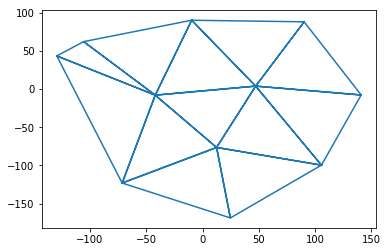

In [106]:
plt.plot(X,Y)

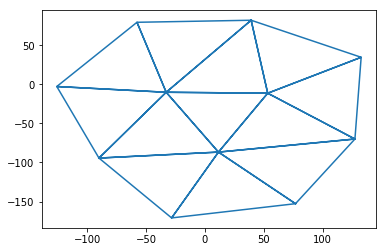

In [120]:
plt.plot(X,Y)

In [44]:
py.iplot(figure, filename='2D-AlphaS-ex', width=850)

PlotlyRequestError: No message

In [31]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()

In [40]:
plotly.tools.set_credentials_file(username="whisponchan", api_key="0QuAfcV72aBLgYS6ZLAQ")